# Immgen ATAC-Seq


In [79]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm.auto import tqdm
import re
import tempfile
import pyranges as pr
from pyranges import PyRanges


In [80]:
PATH = os.path.expanduser('~/data/2024_Immgen')
! mkdir -p {PATH}/pics

def file_to_name(file):
    return re.sub('(.*SRR[0-9]+_)|(_ATAC_seq.*)', '', os.path.basename(file))


def file_to_srr(file):
    return re.sub('_.*', '', os.path.basename(file))

In [81]:
def bedl(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return tf[2] - tf[1]
    except:
        return np.zeros(0)  # Empty file


def lines(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return len(tf)
    except:
        return 0  # Empty file


def d(a, b):
    return a / b if b != 0 else 0


def sorted_file(file):
    ts = tempfile.mktemp()
    !cat {file} | sort -k1,1 -k2,2n > {ts}
    return ts


def last_col(file):
    try:
        cols = len(pd.read_csv(file, sep='\t', nrows=1, header=None).columns)
        return pd.read_csv(file, sep='\t', header=None, usecols=[cols - 1])[cols - 1]
    except:
        return np.zeros(0)  # Empty file

# Load peaks

In [82]:
# Keep the same coloring, even though some peak caller tools doesn't support no-control settings
TOOLS = ['MACS2', 'MACS2 broad', 'SICER', 'HOMER', 'Hotspot', 'Peakseq', 'LanceOtron', 'Omnipeak']
palette = plt.get_cmap('tab10')
TOOLS_PALETTE = {t: palette(i) for i, t in enumerate(TOOLS)}
TOOLS = ['MACS2', 'MACS2 broad', 'SICER', 'HOMER', 'Hotspot', 'LanceOtron', 'Omnipeak']

In [83]:
def atac_load_peaks(path, suffix):
    df = pd.DataFrame(columns=['file', 'peaks'], dtype=object)
    for f in tqdm(os.listdir(path)):
        if not f.endswith(suffix):
            continue
        file = os.path.join(path, f)
        ps = lines(file)
        df.loc[len(df)] = (file, ps)
    return df


def atac_load_peaks_path(path):
    df_macs2 = atac_load_peaks(os.path.join(path, 'macs2'), '.narrowPeak')
    df_macs2['tool'] = 'MACS2'
    print('MACS2', len(df_macs2))

    df_macs2_broad = atac_load_peaks(os.path.join(path, 'macs2'), '.broadPeak')
    df_macs2_broad['tool'] = 'MACS2 broad'
    print('MACS2', len(df_macs2_broad))

    df_sicer = atac_load_peaks(os.path.join(path, 'sicer'), '.scoreisland')
    df_sicer['tool'] = 'SICER'
    print('SICER', len(df_sicer))

    df_omnipeak = atac_load_peaks(os.path.join(path, 'omnipeak'), '.peak')
    df_omnipeak['tool'] = 'Omnipeak'
    print('Omnipeak', len(df_omnipeak))

    df_homer = atac_load_peaks(os.path.join(path, 'homer'), '.peaks')
    df_homer['tool'] = 'HOMER'
    print('HOMER', len(df_homer))

    df_hotspot = atac_load_peaks(os.path.join(path, 'hotspot'), '.peak')
    df_hotspot['tool'] = 'Hotspot'
    print('Hotspot', len(df_hotspot))

    df_lanceotron = atac_load_peaks(os.path.join(path, 'lanceotron'), '.bed')
    df_lanceotron['tool'] = 'LanceOtron'
    print('LanceOtron', len(df_lanceotron))

    return pd.concat([df_macs2, df_macs2_broad, df_sicer, df_omnipeak, df_homer, df_hotspot, df_lanceotron]).reset_index(drop=True)

In [84]:
dfa = atac_load_peaks_path(PATH)
dfa['name'] = [file_to_name(f) for f in dfa['file']]
dfa['srr'] = [file_to_srr(f) for f in dfa['file']]
dfa.sort_values(by='name', inplace=True)
print(list(sorted(dfa['name'].unique())))
dfa.sample(3)

  0%|          | 0/1480 [00:00<?, ?it/s]

MACS2 185


  0%|          | 0/1480 [00:00<?, ?it/s]

MACS2 185


  0%|          | 0/185 [00:00<?, ?it/s]

SICER 185


  0%|          | 0/740 [00:00<?, ?it/s]

Omnipeak 185


  0%|          | 0/185 [00:00<?, ?it/s]

HOMER 185


  0%|          | 0/185 [00:00<?, ?it/s]

Hotspot 185


  0%|          | 0/366 [00:00<?, ?it/s]

LanceOtron 183
['Blood_Monocyte', 'Bone_marrow_B_Cell', 'Bone_marrow_NK_Cell', 'Bone_marrow_Neutrophil', 'Bone_marrow_Stem_Cell', 'Colon_CD4_Treg_Cell', 'Lung_Macrophage', 'Lymph_nodes_gdT_Cell', 'Peritoneal_cavity_B_Cell', 'Peritoneal_cavity_Macrophage', 'Peritoneal_cavity_Neutrophil', 'Skin_draining_lymph_node_Stromal_Cell', 'Small_Intestine_CD8_T_Cell', 'Small_intestine_Dendritic_Cell', 'Small_intestine_Innate_Lymphocytes', 'Small_intestine_lamina_propria_Macrophage', 'Spleen_Activated_T_Cell', 'Spleen_B_Cell', 'Spleen_CD4_Naive_T_Cell', 'Spleen_CD4_Treg_Cell', 'Spleen_CD8_Naive_T_Cell', 'Spleen_CD8_T_Cell', 'Spleen_Dendritic_Cell', 'Spleen_Macrophage', 'Spleen_NKT_Cell', 'Spleen_NK_Cell', 'Spleen_Neutrophil', 'Spleen_gdT_Cell', 'Thymus_CD4_SP_Thymocytes', 'Thymus_CD8_SP_Thymocytes', 'Thymus_DP_Thymocytes', 'Thymus_Double_Negative_Thymocytes', 'Thymus_Immature_Single_Positive_Thymocytes', 'Thymus_Thymic_epithelial_Cell', 'Thymus_gdT_Cell', 'brain_Microglia']


,file,peaks,tool,name,srr
1087,/home/jetbrains/data/2024_Immgen/hotspot/SRR81...,1017826,Hotspot,Thymus_DP_Thymocytes,SRR8186435
73,/home/jetbrains/data/2024_Immgen/macs2/SRR5799...,12064,MACS2,brain_Microglia,SRR5799540
914,/home/jetbrains/data/2024_Immgen/homer/SRR5799...,71604,HOMER,Bone_marrow_Stem_Cell,SRR5799528


/tmp/ipykernel_434611/1105361416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfa, x='tool', y='peaks',


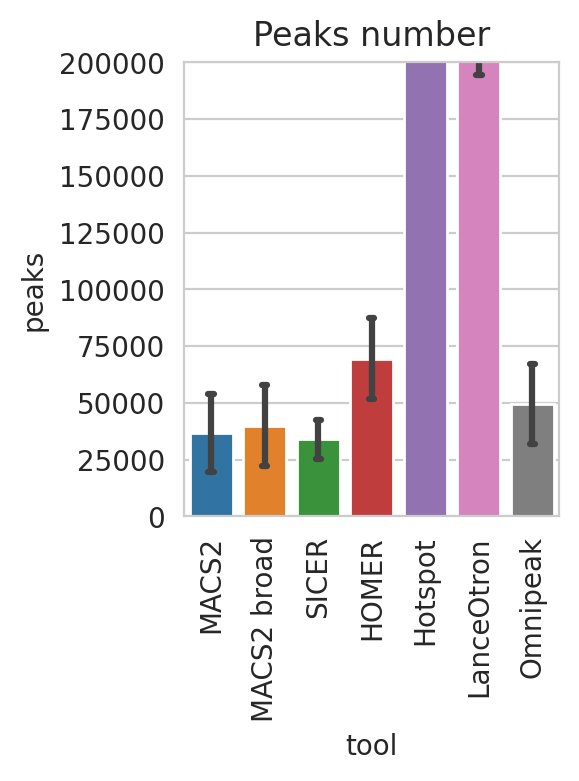

In [85]:
plt.figure(figsize=(3, 4))
ax = plt.axes()
sns.barplot(data=dfa, x='tool', y='peaks',
            order=TOOLS,
            palette=TOOLS_PALETTE,
            errorbar='sd', capsize=.1,
            # err_kws={'linewidth': 2},
            # legend=False,
            ax=ax)
ax.set_ylim(0, 200_000)
plt.xticks(rotation=90)
plt.title('Peaks number')
plt.tight_layout()
plt.tight_layout()
plt.savefig(f'{PATH}/pics/peaks.pdf', bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipykernel_434611/294631968.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfa, x='tool', y='peaks',
/tmp/ipykernel_434611/294631968.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfa, x='tool', y='peaks',
/tmp/ipykernel_434611/294631968.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axt.legend().set_visible(False)


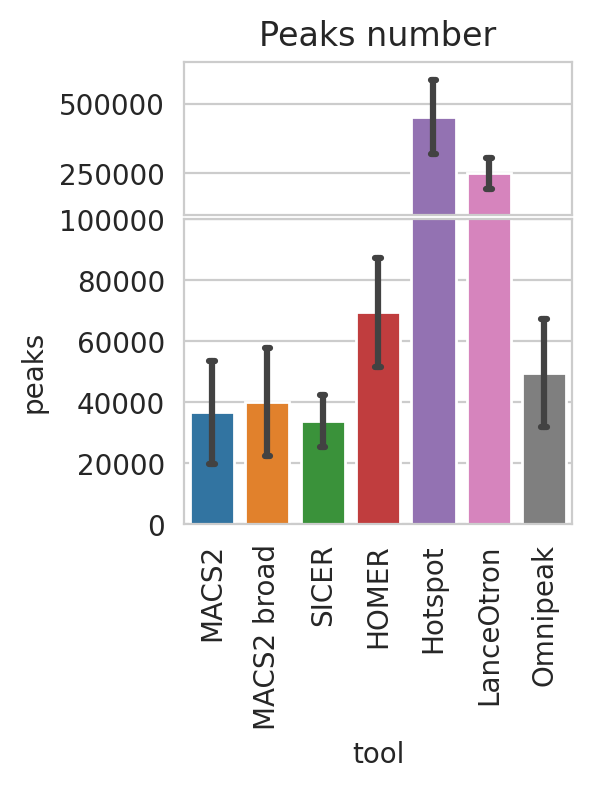

In [86]:
# Set up the matplotlib figure with broken y-axis
f, (axt, ax) = plt.subplots(2, 1, sharex=True, figsize=(2.5, 3),
                            gridspec_kw={'height_ratios': [1, 2]})
for j, axes in enumerate([ax, axt]):
    sns.barplot(data=dfa, x='tool', y='peaks',
            order=TOOLS,
            palette=TOOLS_PALETTE,
            errorbar='sd', capsize=.1,
            ax=axes)
ax.set_ylim(0, 100_000)
axt.set_ylim(100_000, 650_000)
axt.set_xlabel(None)
axt.set_ylabel(None)
ax.xaxis.set_tick_params(rotation=90)
axt.title.set_text('Peaks number')
ax.set_ylabel('peaks')
axt.legend().set_visible(False)
# plt.tight_layout()
plt.subplots_adjust(hspace=0.02)  # Adjust hspace closer to zero to remove spacing
plt.show()

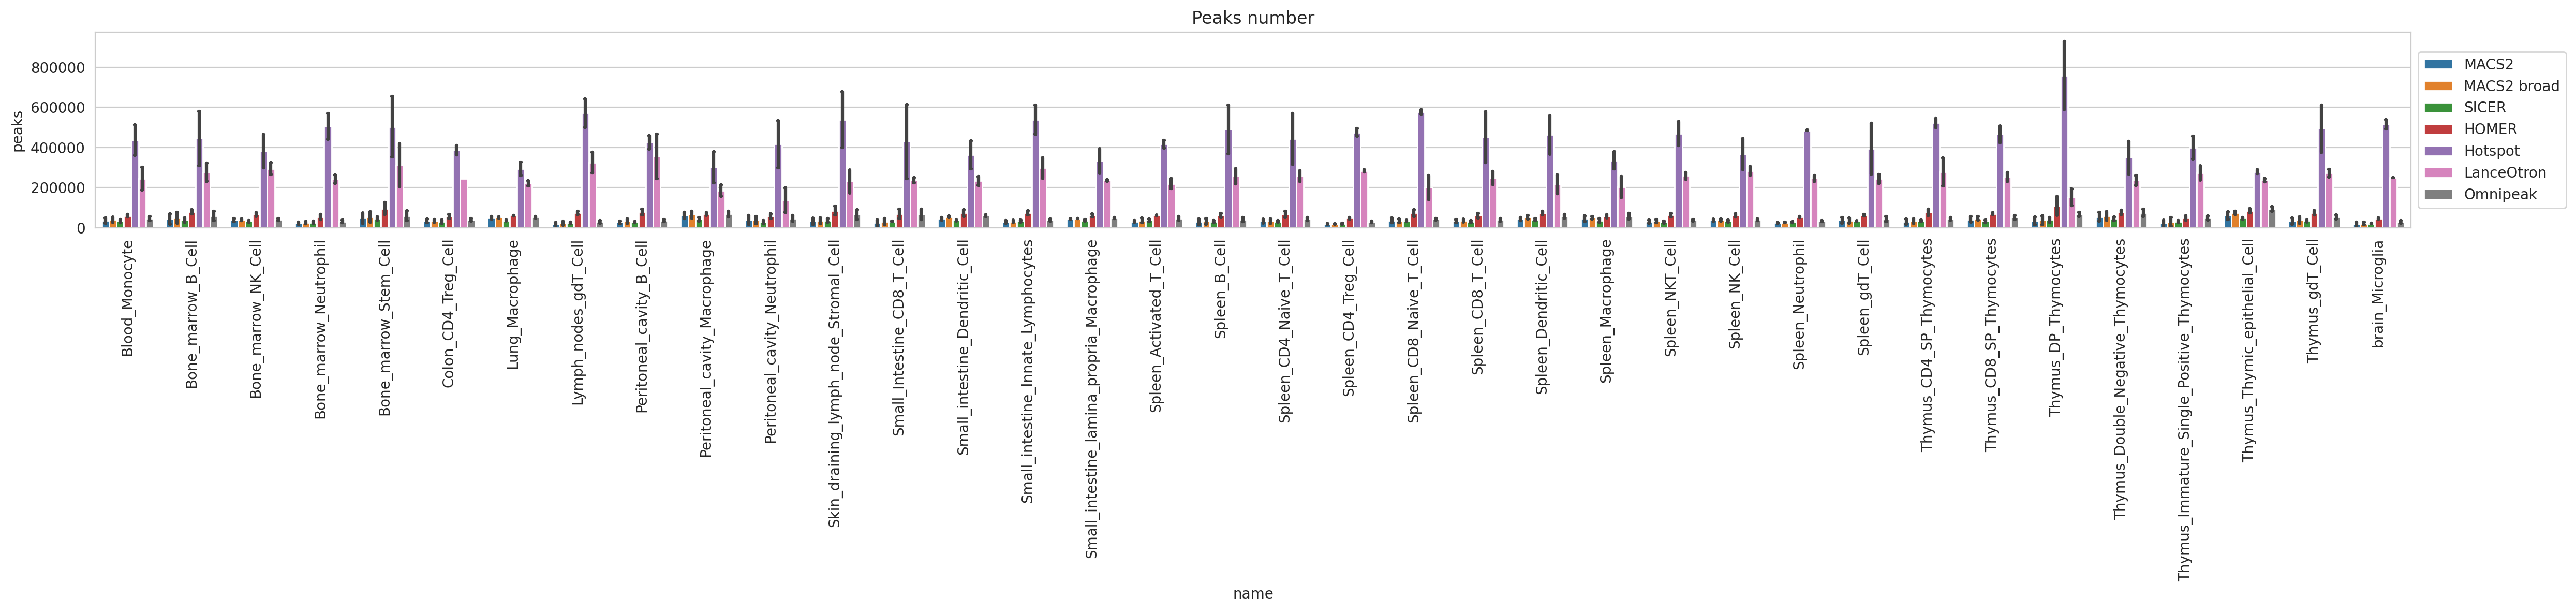

In [87]:
plt.figure(figsize=(25, 6))
g_result = sns.barplot(data=dfa, x='name', y='peaks', hue='tool',
                       hue_order=TOOLS,
                       palette=TOOLS_PALETTE,
                       errorbar='sd', capsize=.05,
                       # err_kws={'linewidth': 2}
                       )
g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.title('Peaks number')
plt.tight_layout()
plt.tight_layout()
plt.savefig(f'{PATH}/pics/peaks.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Lengths

In [88]:
ts = []
for srr, name, tool, file in tqdm(zip(dfa['srr'], dfa['name'], dfa['tool'], dfa['file'])):
    lengths = bedl(file)
    t = pd.DataFrame(dict(length=lengths))
    # Some tracks may have open chromatin clusters, which significantly affects average, 
    # so pick only lengths limited to 80%
    t.sort_values(by=['length'], inplace=True)
    t = t.iloc[0:int(len(t) * 0.8)].copy()
    t = t.sample(min(len(t), 10_000)).copy()
    t['srr'] = srr
    t['name'] = name
    t['tool'] = tool
    ts.append(t)
df_lens = pd.concat(ts).reset_index(drop=True)
del ts
df_lens.sample(10)

0it [00:00, ?it/s]

,length,srr,name,tool
10836451,86,SRR5799396,Thymus_CD8_SP_Thymocytes,MACS2
7953635,442,SRR5799559,Spleen_CD4_Treg_Cell,LanceOtron
8614585,305,SRR5799434,Spleen_CD8_T_Cell,Hotspot
7917110,225,SRR5799559,Spleen_CD4_Treg_Cell,MACS2
12831244,109,SRR5799540,brain_Microglia,LanceOtron
8875301,81,SRR5799551,Spleen_Dendritic_Cell,MACS2 broad
1676825,97,SRR5799406,Bone_marrow_Neutrophil,MACS2 broad
4998503,93,SRR5799524,Small_intestine_Dendritic_Cell,MACS2
343763,171,SRR5799492,Blood_Monocyte,Hotspot
9449774,1999,SRR5799477,Spleen_NKT_Cell,SICER


In [89]:
print(df_lens['length'].min())
df_lens = df_lens[df_lens['length'] > 0].reset_index(drop=True)

0


/tmp/ipykernel_434611/4144212806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_result = sns.boxplot(data=df_lens, x='tool', y='length',


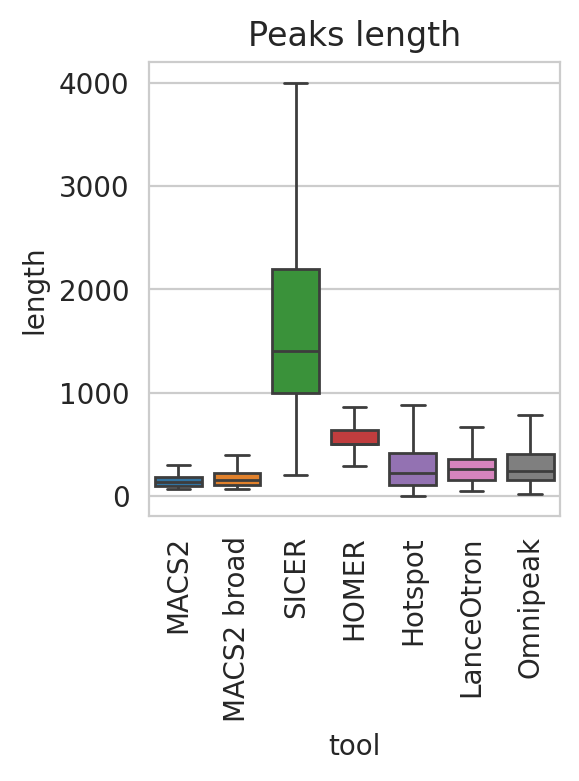

In [90]:
plt.figure(figsize=(3, 4))
g_result = sns.boxplot(data=df_lens, x='tool', y='length',
                       order=TOOLS,
                       palette=TOOLS_PALETTE,
                       showfliers=False)
plt.xticks(rotation=90)
plt.title('Peaks length')
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/peaks_length.pdf', bbox_inches='tight', dpi=300)
plt.show()

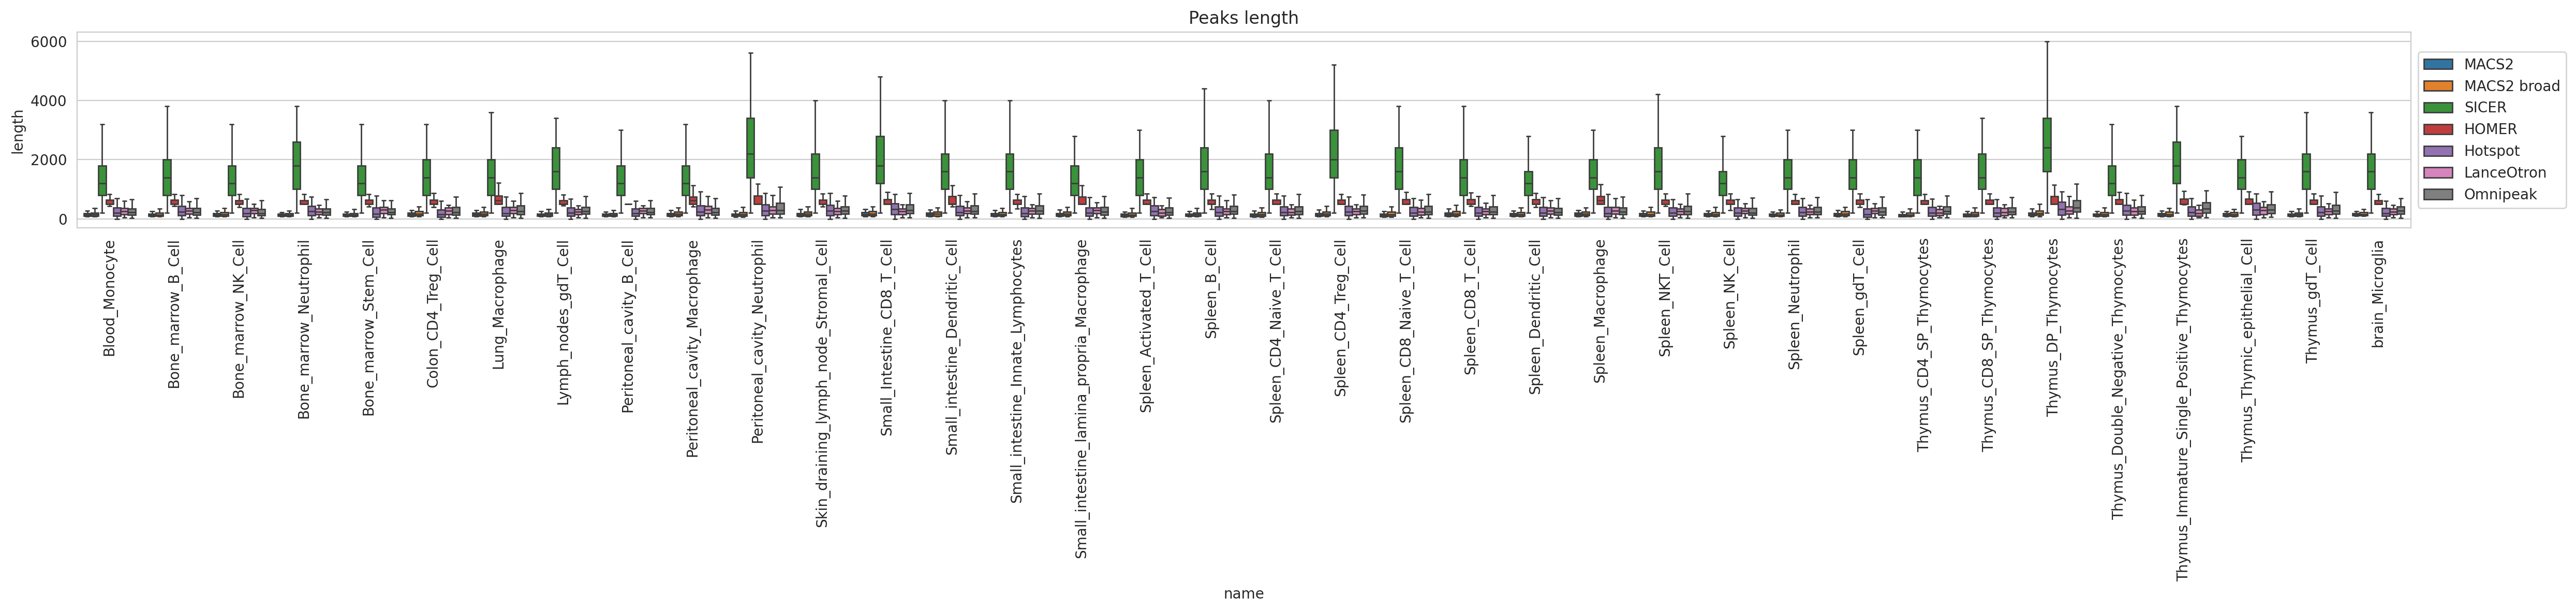

In [91]:
plt.figure(figsize=(25, 6))
g_result = sns.boxplot(data=df_lens, x='name', y='length', hue='tool',
                       hue_order=TOOLS,
                       palette=TOOLS_PALETTE,
                       showfliers=False)
plt.xticks(rotation=90)
plt.title('Peaks length')
g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/peaks_length.pdf', bbox_inches='tight', dpi=300)
plt.show()

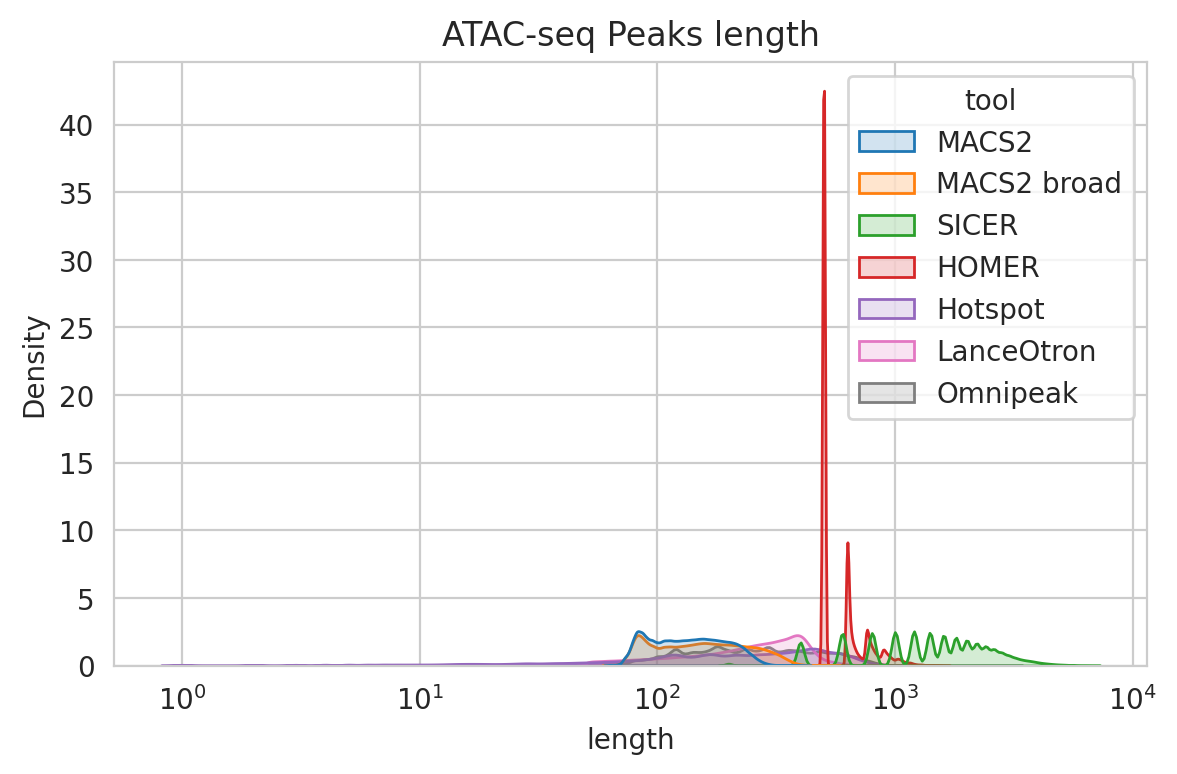

In [92]:
plt.figure(figsize=(6, 4))
ax = plt.axes()
g_results = sns.kdeplot(data=df_lens, x='length', hue='tool', ax=ax,
                        hue_order=TOOLS,
                        palette=TOOLS_PALETTE,
                        fill=True, common_norm=False,
                        warn_singular=False,
                        log_scale=True, alpha=0.2)
g_results.set(xscale='log')
# g_results.set_ylim(0, 5)
# g_results.set_xlim(-1, 8e3)
ax.title.set_text('ATAC-seq Peaks length')
plt.tight_layout()
plt.savefig(f'{PATH}/pics/peaks_length2.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Overlaps

In [93]:
! mkdir {PATH}/overlaps
from itertools import product
import pyranges as pr


def compute_overlaps(df):
    dfoverlap = pd.DataFrame(columns=['name', 'tool', 'file1', 'file2',
                                      'peaks1', 'peaks2', 'overlap12', 'overlap21',
                                      'peaks1_len', 'peaks2_len', 'overlap_len'], dtype=object)
    for (name, tool), dft in tqdm(list(df.groupby(['name', 'tool']))):
        print('Processing', name, tool, len(dft))
        if len(dft) < 2:
            continue
        files = list(dft['file'])
        ranges = [None] * len(files)
        peaks = [-1] * len(files)
        peaks_lens = [-1] * len(files)
        # print('Load')
        for i, file in enumerate(files):
            peaks[i] = lines(file)
            if peaks[i] == 0:
                peaks_lens[i] = 0
                continue
            ranges[i] = pr.read_bed(sorted_file(file))
            peaks_lens[i] = ranges[i].lengths().sum()
        for i, j in product(range(len(ranges)), range(len(ranges))):
            if i >= j:
                continue
            file1, file2 = files[i], files[j]
            ranges1, ranges2 = ranges[i], ranges[j]
            peaks1, peaks2 = peaks[i], peaks[j]
            peaks1_len, peaks2_len = peaks_lens[i], peaks_lens[j]
            if peaks1 <= 0 or peaks2 <= 0:
                dfoverlap.loc[len(dfoverlap)] = (name, tool, file1, file2,
                                                 peaks1, peaks2, 0, 0,
                                                 peaks1_len, peaks2_len, 0)
                continue
            overlap1 = len(ranges1.overlap(ranges2))
            overlap2 = len(ranges2.overlap(ranges1))
            overlap_len = ranges1.intersect(ranges2).lengths().sum()
            dfoverlap.loc[len(dfoverlap)] = (name, tool, file1, file2,
                                             peaks1, peaks2, overlap1, overlap2,
                                             peaks1_len, peaks2_len, overlap_len)
    return dfoverlap

mkdir: cannot create directory ‘/home/jetbrains/data/2024_Immgen/overlaps’: File exists


In [94]:
df_overlap = compute_overlaps(dfa)

  0%|          | 0/252 [00:00<?, ?it/s]

Processing Blood_Monocyte HOMER 6
Processing Blood_Monocyte Hotspot 6
Processing Blood_Monocyte LanceOtron 6
Processing Blood_Monocyte MACS2 6
Processing Blood_Monocyte MACS2 broad 6
Processing Blood_Monocyte Omnipeak 6
Processing Blood_Monocyte SICER 6
Processing Bone_marrow_B_Cell HOMER 12
Processing Bone_marrow_B_Cell Hotspot 12
Processing Bone_marrow_B_Cell LanceOtron 12
Processing Bone_marrow_B_Cell MACS2 12
Processing Bone_marrow_B_Cell MACS2 broad 12
Processing Bone_marrow_B_Cell Omnipeak 12
Processing Bone_marrow_B_Cell SICER 12
Processing Bone_marrow_NK_Cell HOMER 6
Processing Bone_marrow_NK_Cell Hotspot 6
Processing Bone_marrow_NK_Cell LanceOtron 6
Processing Bone_marrow_NK_Cell MACS2 6
Processing Bone_marrow_NK_Cell MACS2 broad 6
Processing Bone_marrow_NK_Cell Omnipeak 6
Processing Bone_marrow_NK_Cell SICER 6
Processing Bone_marrow_Neutrophil HOMER 2
Processing Bone_marrow_Neutrophil Hotspot 2
Processing Bone_marrow_Neutrophil LanceOtron 2
Processing Bone_marrow_Neutrophil M

In [95]:
df_overlap['jaccard'] = [
    d(lo, l1 + l2 - lo)
    for l1, l2, lo in zip(df_overlap['peaks1_len'], df_overlap['peaks2_len'], df_overlap['overlap_len'])
]
df_overlap.sort_values(by='name', inplace=True)

Jaccard


/tmp/ipykernel_434611/2252229643.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_overlap,
/tmp/ipykernel_434611/2252229643.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_overlap,


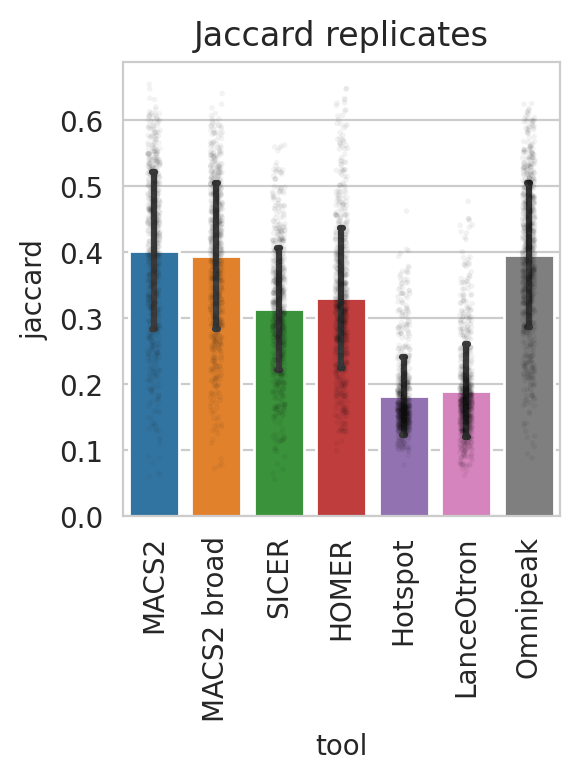

In [96]:
print('Jaccard')

plt.figure(figsize=(3, 4))
ax = plt.axes()
sns.barplot(data=df_overlap,
            x='tool', y='jaccard',
            order=TOOLS,
            # legend=False,
            dodge=False,
            palette=TOOLS_PALETTE,
            errorbar='sd', capsize=.05,
            # err_kws={'linewidth': 2}
            ax=ax)
sns.stripplot(data=df_overlap,
              x='tool', y='jaccard',
              order=TOOLS,
              dodge=False, size=2, color="black", alpha=0.05, palette='dark:black',
              legend=False,
              ax=ax)

plt.xticks(rotation=90)
plt.title('Jaccard replicates')
plt.tight_layout()
plt.savefig(f'{PATH}/pics/jaccard.pdf', bbox_inches='tight', dpi=300)
plt.show()

Jaccard


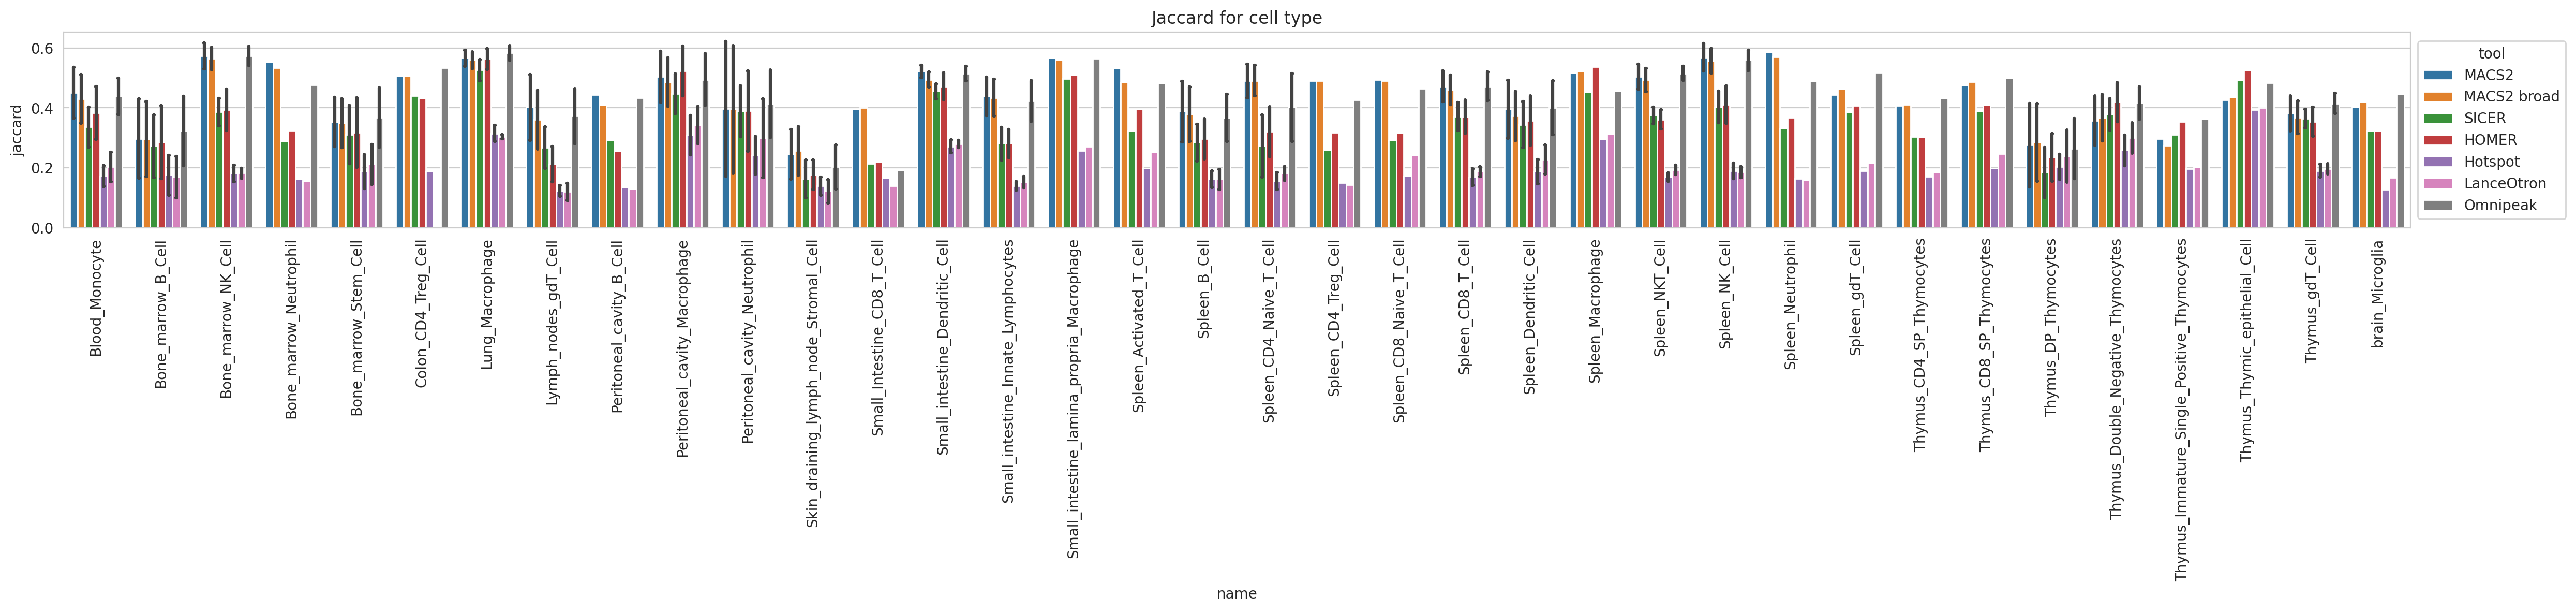

In [97]:
print('Jaccard')

plt.figure(figsize=(25, 6))
ax = plt.axes()
sns.barplot(data=df_overlap,
            x='name', y='jaccard',
            hue='tool',
            hue_order=TOOLS,
            dodge=True,
            palette=TOOLS_PALETTE,
            errorbar='sd', capsize=.05,
            # err_kws={'linewidth': 2},
            ax=ax)
plt.xticks(rotation=90)
plt.title('Jaccard for cell type')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(f'{PATH}/pics/jaccard.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Overlap with DHS

In [98]:
from itertools import product

DHS_PATH = f'{PATH}/ENCFF754WCT_mm10_dhs_representative_sites.bed'
dhs_path_sorted = sorted_file(DHS_PATH)
DHS_PEAKS = lines(DHS_PATH)


def compute_dhs_overlaps(df):
    dfoverlap = pd.DataFrame(columns=['srr', 'name', 'tool', 'file', 'way', 'peaks', 'overlap'], dtype=object)
    for (srr, name, tool), dft in tqdm(list(df.groupby(['srr', 'name', 'tool']))):
        print('Processing', srr, name, tool, len(dft))
        for _, row in dft.iterrows():
            file, peaks = sorted_file(row['file']), row['peaks']

            tf = f'{PATH}/overlaps/overlaps_{tool}_{name}_{tool}_vs_dhs.bed'.replace(' ', '_')
            !bedtools intersect -a {file} -b {dhs_path_sorted} -wa -u > {tf}
            owd = lines(tf)
            dfoverlap.loc[len(dfoverlap)] = (srr, name, tool, file, 'with_dhs', peaks, owd)

            tf = f'{PATH}/overlaps/overlaps_{tool}_{name}_{tool}_dhs_vs.bed'.replace(' ', '_')
            !bedtools intersect -b {file} -a {dhs_path_sorted} -wa -u > {tf}
            odw = lines(tf)
            dfoverlap.loc[len(dfoverlap)] = (srr, name, tool, file, 'dhs_with', DHS_PEAKS, odw)
    return dfoverlap

In [99]:
dhs_overlap = compute_dhs_overlaps(dfa)
dhs_overlap.sample(3)

  0%|          | 0/1293 [00:00<?, ?it/s]

Processing SRR5799381 Thymus_Thymic_epithelial_Cell HOMER 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell Hotspot 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell LanceOtron 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell MACS2 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell MACS2 broad 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell Omnipeak 1
Processing SRR5799381 Thymus_Thymic_epithelial_Cell SICER 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell HOMER 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell Hotspot 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell LanceOtron 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell MACS2 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell MACS2 broad 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell Omnipeak 1
Processing SRR5799382 Thymus_Thymic_epithelial_Cell SICER 1
Processing SRR5799383 Thymus_Double_Negative_Thymocytes HOMER 1
Processing SRR5799383 Thymus_Double_Negative_Thymocytes Hotspot 

,srr,name,tool,file,way,peaks,overlap
813,SRR5799439,Spleen_CD8_T_Cell,LanceOtron,/tmp/tmp2oqtfns9,dhs_with,1192301,175705
2150,SRR5799534,Spleen_CD4_Naive_T_Cell,SICER,/tmp/tmpj_avkxez,with_dhs,33138,32705
1471,SRR5799486,Small_intestine_Innate_Lymphocytes,LanceOtron,/tmp/tmpflmnpe6u,dhs_with,1192301,174352


In [100]:
dhs_overlap['overlap_share'] = [o / p if p > 0 else 0 for o, p in zip(dhs_overlap['overlap'], dhs_overlap['peaks'])]
dhs_overlap.sample(3)

,srr,name,tool,file,way,peaks,overlap,overlap_share
2407,SRR5799553,Spleen_Dendritic_Cell,Hotspot,/tmp/tmptrd4pbxm,dhs_with,1192301,304171,0.255113
2467,SRR5799557,Spleen_B_Cell,MACS2,/tmp/tmpt7rw8856,dhs_with,1192301,10537,0.008838
1182,SRR5799465,Spleen_B_Cell,Omnipeak,/tmp/tmpazofa3qd,with_dhs,52352,49916,0.953469


/tmp/ipykernel_434611/635413011.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  t['overlap'].clip(upper=0.15, inplace=True)
/tmp/ipykernel_434611/635413011.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.15' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  t['overlap'].clip(upper=0.15, inplace=True)


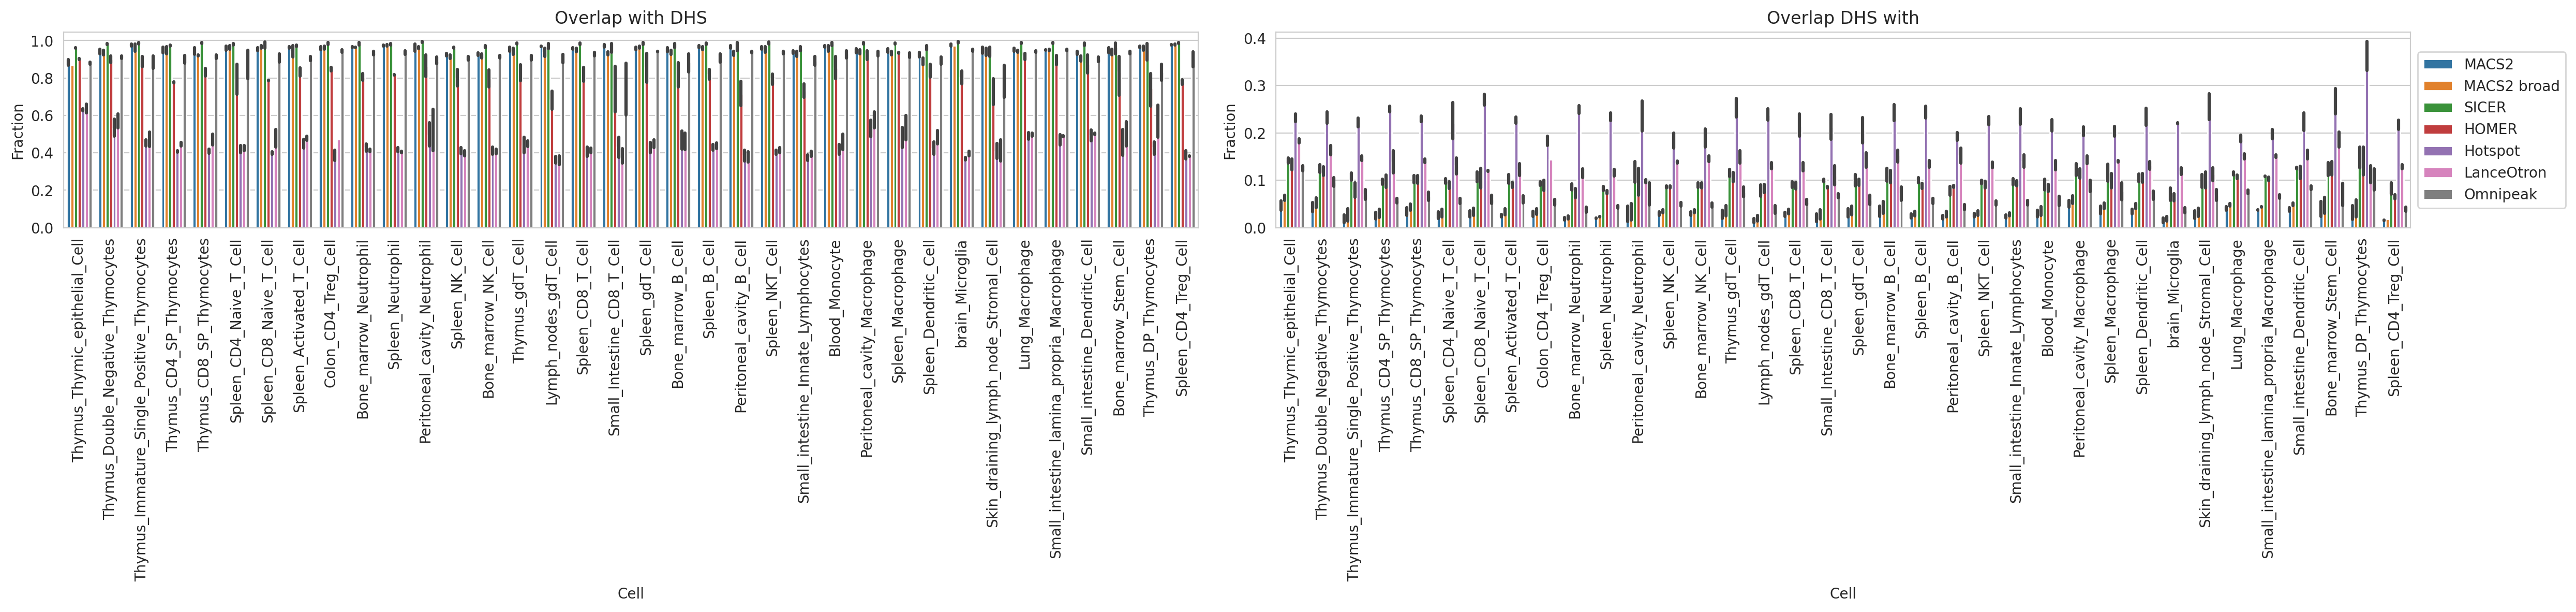

In [101]:
plt.figure(figsize=(25, 6))
# Plot 
ax = plt.subplot(1, 2, 1)
ax.title.set_text('Overlap with DHS')
sns.barplot(data=dhs_overlap[dhs_overlap['way'] == 'with_dhs'], x='name', y='overlap_share', hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            # errorbar='sd', capsize=.05, err_kws={'linewidth': 2},
            ax=ax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel('Cell')
ax.set_ylabel('Fraction')
ax.legend(loc='lower left', title='tool')
ax.legend().set_visible(False)

ax = plt.subplot(1, 2, 2)
ax.title.set_text('Overlap DHS with')
t = dhs_overlap[dhs_overlap['way'] == 'dhs_with'].copy()
t['overlap'].clip(upper=0.15, inplace=True)
sns.barplot(data=t, x='name', y='overlap_share', hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            # errorbar='sd', capsize=.05, err_kws={'linewidth': 2},
            ax=ax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel('Cell')
ax.set_ylabel('Fraction')
ax.legend(loc='lower left', title='tool')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{PATH}/pics/dhs.pdf', bbox_inches='tight', dpi=300)
plt.show()

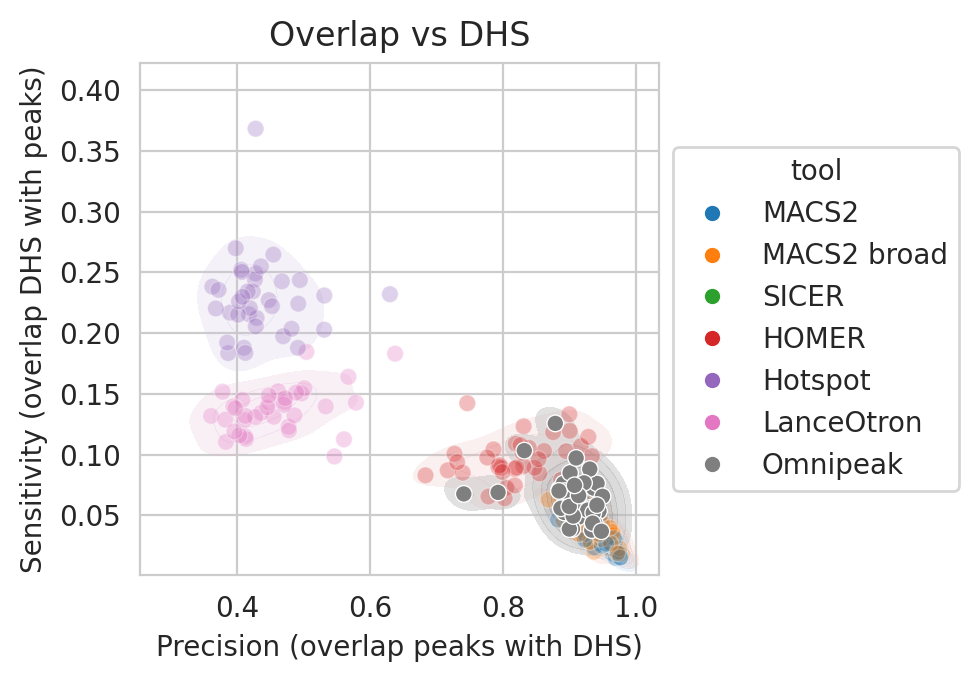

In [102]:
t = pd.pivot_table(dhs_overlap[['name', 'tool', 'way', 'overlap_share']],
                   values='overlap_share', columns=['way'], index=['name', 'tool']).reset_index()

t = t[t['tool'] != 'SICER']
plt.figure(figsize=(5, 3.5))
ax = plt.axes()
sns.kdeplot(t[t['tool'] != 'Omnipeak'],
            hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            x='with_dhs', y='dhs_with',
            alpha=0.2,
            thresh=0.05,
            fill=True,
            legend=False,
            ax=ax)
sns.kdeplot(t[t['tool'] == 'Omnipeak'],
            hue='tool',
            hue_order=TOOLS,
            palette=TOOLS_PALETTE,
            x='with_dhs', y='dhs_with',
            alpha=0.5,
            thresh=0.05,
            fill=True,
            legend=False,
            ax=ax)

sns.scatterplot(
    t[t['tool'] != 'Omnipeak'], x='with_dhs', y='dhs_with',
    hue='tool',
    hue_order=TOOLS,
    alpha=0.3,
    palette=TOOLS_PALETTE,
    legend=False,
    ax=ax)
sns.scatterplot(
    t[t['tool'] == 'Omnipeak'], x='with_dhs', y='dhs_with',
    hue='tool',
    hue_order=TOOLS,
    palette=TOOLS_PALETTE,
    ax=ax)

ax.set_xlabel('Precision (overlap peaks with DHS)')
ax.set_ylabel('Sensitivity (overlap DHS with peaks)')
ax.title.set_text('Overlap vs DHS')
sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Top peaks vs DHS

In [103]:
def compute_dhs_overlaps_n(df):
    dhs_file = pr.read_bed(dhs_path_sorted)
    dhs_len = dhs_file.lengths().sum()
    rows = []
    for _, (srr, n, tool, file) in tqdm(list(df[['srr', 'name', 'tool', 'file']].iterrows())):
        print('Processing', n, tool, file)
        peaks_file = pr.read_bed(sorted_file(file), as_df=True)
        if len(peaks_file) == 0:
            for top in np.linspace(1000, 50000, 25):
                rows.append((srr, n, tool, int(top), DHS_PEAKS, file, 0, 0, 0, dhs_len, 0, 0))
            continue
        peaks_file.sort_values(
            by=peaks_file.columns[8] if len(peaks_file.columns) >= 9 else peaks_file.columns[3],
            ascending=False, inplace=True
        )
        for top in np.linspace(1000, 50000, 25):
            t = PyRanges(peaks_file.head(int(top)).sort_values(by=['Chromosome', 'Start']))
            peaks = len(t)
            peaks_len = t.lengths().sum()
            ovlp = t.overlap(dhs_file)
            peaks_overlap = len(ovlp)
            overlap_len = ovlp.lengths().sum()
            dhs_overlap = len(dhs_file.overlap(t))
            rows.append((srr, n, tool, int(top), DHS_PEAKS, file, peaks, peaks_overlap, dhs_overlap, dhs_len, peaks_len,
                         overlap_len))

    df = pd.DataFrame(
        rows,
        columns=['srr', 'name', 'tool', 'top', 'dhs_peaks', 'peaks_file', 'peaks', 'peaks_overlap', 'dhs_overlap',
                 'dhs_len', 'peaks_len', 'overlap_len'],
        dtype=object
    )
    df['jaccard'] = [
        d(o, lp + ld - o)
        for lp, ld, o in zip(df['peaks_len'], df['dhs_len'], df['overlap_len'])
    ]

    return df

In [104]:
dhs_ovlp_df = compute_dhs_overlaps_n(dfa)
dhs_ovlp_df.sample(3)

  0%|          | 0/1293 [00:00<?, ?it/s]

Processing Blood_Monocyte MACS2 /home/jetbrains/data/2024_Immgen/macs2/SRR5799493_Blood_Monocyte_ATAC_seq_q0.05_peaks.narrowPeak
Processing Blood_Monocyte SICER /home/jetbrains/data/2024_Immgen/sicer/SRR5799541_Blood_Monocyte_ATAC_seq-W200-G600-E100.scoreisland
Processing Blood_Monocyte MACS2 broad /home/jetbrains/data/2024_Immgen/macs2/SRR5799492_Blood_Monocyte_ATAC_seq_broad0.1_peaks.broadPeak
Processing Blood_Monocyte HOMER /home/jetbrains/data/2024_Immgen/homer/SRR5799492_Blood_Monocyte_ATAC_seq.peaks
Processing Blood_Monocyte SICER /home/jetbrains/data/2024_Immgen/sicer/SRR5799493_Blood_Monocyte_ATAC_seq-W200-G600-E100.scoreisland
Processing Blood_Monocyte Hotspot /home/jetbrains/data/2024_Immgen/hotspot/SRR5799541_Blood_Monocyte_ATAC_seq.peak
Processing Blood_Monocyte MACS2 /home/jetbrains/data/2024_Immgen/macs2/SRR5799542_Blood_Monocyte_ATAC_seq_q0.05_peaks.narrowPeak
Processing Blood_Monocyte MACS2 /home/jetbrains/data/2024_Immgen/macs2/SRR5799491_Blood_Monocyte_ATAC_seq_q0.05_

,srr,name,tool,top,dhs_peaks,peaks_file,peaks,peaks_overlap,dhs_overlap,dhs_len,peaks_len,overlap_len,jaccard
6217,SRR5799520,Lung_Macrophage,MACS2 broad,35708,1192301,/home/jetbrains/data/2024_Immgen/macs2/SRR5799...,35708,34712,44675,311395372,11223888,11036153,0.035420
27004,SRR5799395,Thymus_CD4_SP_Thymocytes,Hotspot,9166,1192301,/home/jetbrains/data/2024_Immgen/hotspot/SRR57...,9166,3279,4374,311395372,3386800,1795748,0.005737
9207,SRR5799498,Peritoneal_cavity_Macrophage,Hotspot,15291,1192301,/home/jetbrains/data/2024_Immgen/hotspot/SRR57...,15291,7887,12415,311395372,6019414,4714390,0.015076


In [105]:
dhs_ovlp_df['p'] = (dhs_ovlp_df['peaks_overlap'] + dhs_ovlp_df['dhs_overlap']) / 2
dhs_ovlp_df['precision'] = [d(x, y) for x, y in zip(dhs_ovlp_df['peaks_overlap'], dhs_ovlp_df['peaks'])]
dhs_ovlp_df['sensitivity'] = [d(x, y) for x, y in zip(dhs_ovlp_df['dhs_overlap'], dhs_ovlp_df['dhs_peaks'])]
dhs_ovlp_df['f1'] = [
    2 / (d(1, s + 1e-10) + d(1, p + 1e-10))
    for s, p in zip(dhs_ovlp_df['sensitivity'], dhs_ovlp_df['precision'])]

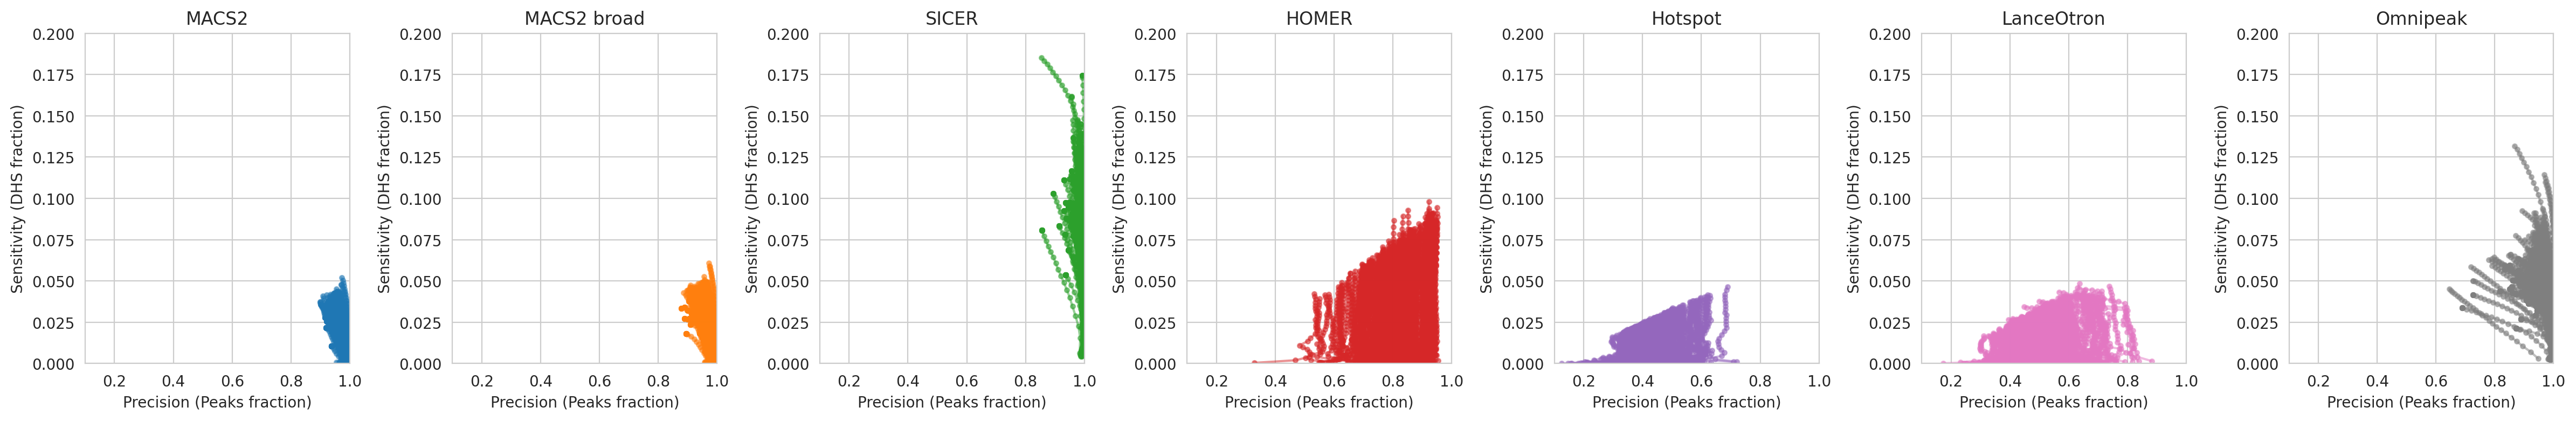

In [106]:
plt.figure(figsize=(24, 4))
axs = [plt.subplot(1, 7, i + 1) for i in range(7)]
for i, tool in enumerate(TOOLS):
    ax = axs[i]
    for (srr, n), dft in dhs_ovlp_df[dhs_ovlp_df['tool'] == tool].groupby(['srr', 'name']):
        ax.plot(dft['precision'], dft['sensitivity'], marker='.',
                color=TOOLS_PALETTE[tool], alpha=0.5)
    ax.set_title(f'{tool}')
    ax.set_xlabel('Precision (Peaks fraction)')
    ax.set_ylabel('Sensitivity (DHS fraction)')
    ax.set_xlim(0.1, 1.0)
    ax.set_ylim(0.0, 0.2)
plt.tight_layout()
plt.show()

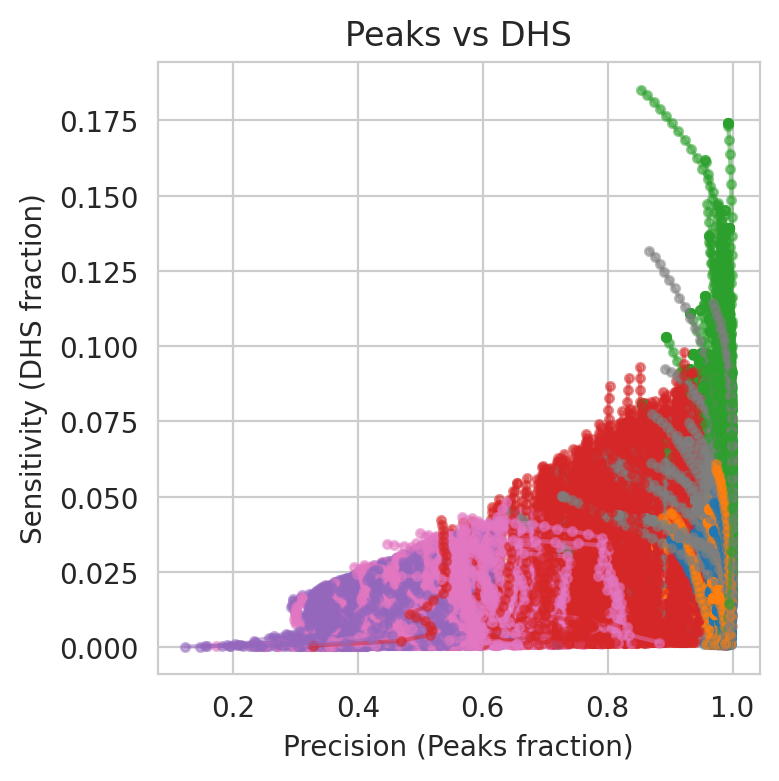

In [107]:
plt.figure(figsize=(4, 4))
for (srr, n, tool), dft in dhs_ovlp_df.groupby(['srr', 'name', 'tool']):
    # print(srr, n, tool)
    plt.plot(dft['precision'], dft['sensitivity'], marker='.',
             color=TOOLS_PALETTE[tool], alpha=0.5)
plt.title('Peaks vs DHS')
plt.xlabel('Precision (Peaks fraction)')
plt.ylabel('Sensitivity (DHS fraction)')
plt.tight_layout()
plt.show()

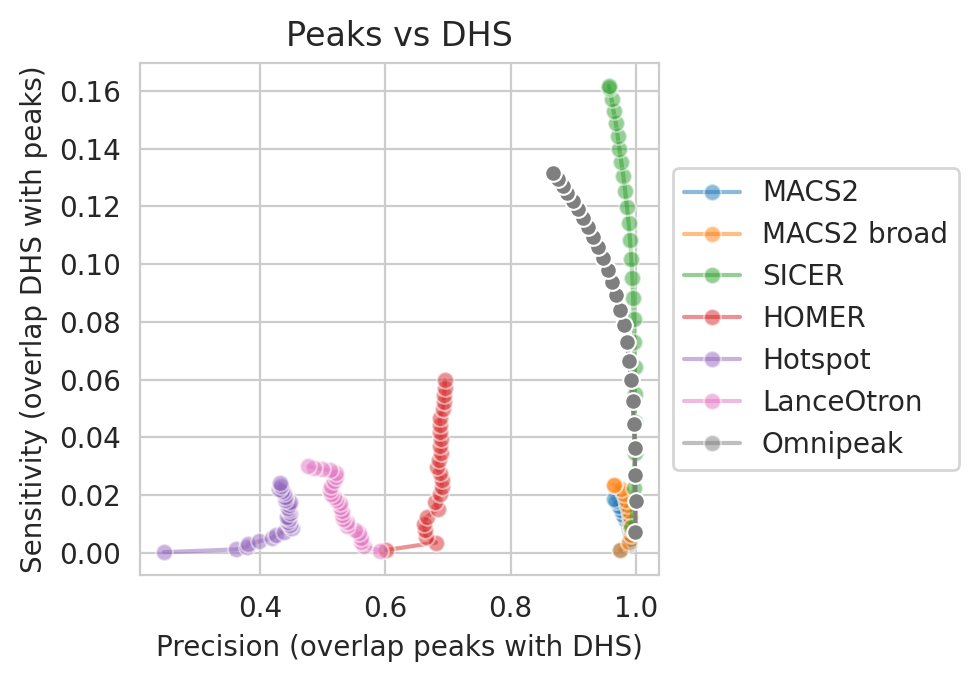

In [108]:
plt.figure(figsize=(5, 3.5))
ax = plt.axes()
t = dhs_ovlp_df[(dhs_ovlp_df['srr'] == 'SRR5799546')]
sns.lineplot(
    data=t[t['tool'] != 'Omnipeak'],
    x='precision', y='sensitivity',
    hue_order=TOOLS,
    hue='tool', marker='o',
    alpha=0.5,
    sort=False,
    palette=TOOLS_PALETTE,
    ax=ax
)
sns.lineplot(
    data=t[t['tool'] == 'Omnipeak'],
    x='precision', y='sensitivity',
    hue_order=TOOLS,
    hue='tool', marker='o',
    alpha=1,
    sort=False,
    palette=TOOLS_PALETTE,
    legend=False,
    ax=ax
)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Peaks vs DHS')
plt.xlabel('Precision (overlap peaks with DHS)')
plt.ylabel('Sensitivity (overlap DHS with peaks)')

plt.tight_layout()
plt.show()

In [109]:
rows = []
for (srr, n, tool), dft in dhs_ovlp_df.groupby(['srr', 'name', 'tool']):
    dft.sort_values(by=['top'], inplace=True)
    ap = 0
    sprev, pprev = None, None
    for _, row in dft.iterrows():
        if sprev is not None and pprev is not None:
            ap += (row['sensitivity'] - sprev) * (row['precision'] + pprev) / 2
        sprev, pprev = row['sensitivity'], row['precision']
    rows.append((srr, n, tool, ap))
dhs_ovlp_df_df = pd.DataFrame(rows, columns=['srr', 'name', 'tool', 'auc'])
del rows
dhs_ovlp_df_df.sample(2)

,srr,name,tool,auc
491,SRR5799451,Bone_marrow_B_Cell,MACS2,0.025176
659,SRR5799475,Spleen_NKT_Cell,MACS2,0.020466


/tmp/ipykernel_434611/18468841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=t, x='tool', y='auc',


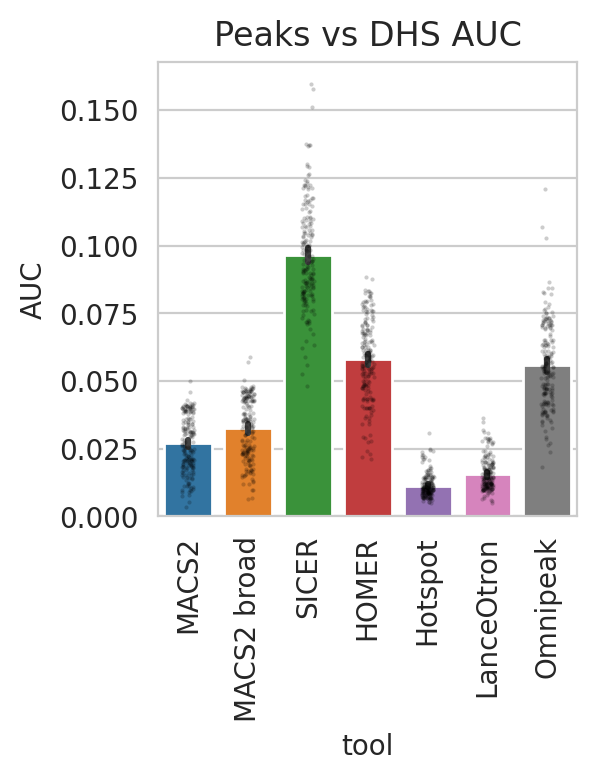

In [110]:
plt.figure(figsize=(3, 4))
ax = plt.axes()
ax.title.set_text('Peaks vs DHS AUC')
t = dhs_ovlp_df_df
sns.barplot(data=t, x='tool', y='auc',
            # capsize=.1, err_kws={'linewidth': 2},
            order=TOOLS,
            palette=TOOLS_PALETTE,
            ax=ax)
sns.stripplot(data=t, x='tool', y='auc',
              dodge=True, size=1.5, color="black", alpha=0.2,
              order=TOOLS,
              ax=ax)

ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('AUC')
plt.tight_layout()
plt.show()

# Bigwigs based coverage

In [ ]:
def atac_load_bws(path):
    df = pd.DataFrame(columns=['file', 'srr', 'name'], dtype=object)
    for f in tqdm(os.listdir(path)):
        if not f.endswith('.bw'):
            continue
        file = os.path.join(path, f)
        df.loc[len(df)] = (file, file_to_srr(f), file_to_name(f))
    return df


df_bams = atac_load_bws(PATH + '/bw')
df_bams.sample(3)

In [ ]:
# ! conda install pyBigWig -c bioconda -y

In [ ]:
import pyBigWig

CHROM_SIZES = {
    c: s for _, (c, s) in pd.read_csv(os.path.join(PATH, 'mm10.chrom.sizes'),
                                      sep='\t', names=['chr', 'size']).iterrows() if '_' not in c
}

total_coverages = {}
ts = []
for _, (file, srr, name) in tqdm(list(df_bams[['file', 'srr', 'name']].iterrows())):
    try:
        with pyBigWig.open(file) as bw:
            total_coverage = sum(
                bw.stats(chr, exact=True, type='sum')[0] for chr in CHROM_SIZES.keys() if '_' not in chr)
            print('Total coverage', total_coverage)
            # Multiplier to align BAM coverage with BigWig estimation
            total_coverage *= 1.1e-2
            total_coverages[(srr, name)] = total_coverage
    except Exception:
        pass

total_coverages

In [ ]:
total_coverages_df = pd.DataFrame([(srr, name, reads) for (srr, name), reads in total_coverages.items()],
                                  columns=['srr', 'name', 'reads'])
total_coverages_df.sample(5)

In [ ]:
plt.figure(figsize=(14, 6))
g_result = sns.barplot(data=total_coverages_df, x='name', y='reads',
                       color='grey'
                       )
# g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.title('Reads')
plt.tight_layout()
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/peaks.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Difference

In [ ]:
diff_bench_df = pd.DataFrame(
    columns=['cell', 'srr', 'name', 'peaks'],
    dtype=object
)

tf = tempfile.mktemp()

for srr in tqdm(dfa['srr'].unique()):
    print(srr)
    t = dfa[(dfa['tool'] == 'Omnipeak') & (dfa['srr'] == srr)]
    if len(t) == 0:
        continue
    omnipeak_file = sorted_file(t['file'].values[0])
    cell_name = t['name'].values[0]
    # Processing single tools information
    for tool in dfa['tool'].unique():
        if tool == 'Omnipeak':
            continue
        t = dfa[(dfa['tool'] == tool) & (dfa['srr'] == srr)]
        if len(t) == 0:
            continue
        peaks_file = sorted_file(t['file'].values[0])
        for name, args in [
            (f'Omnipeak - {tool}', f' -a {omnipeak_file} -b {peaks_file} '),
            (f'{tool} - Omnipeak', f' -b {omnipeak_file} -a {peaks_file} ')]:
            !echo '' > {tf}
            !bedtools intersect {args} -wa -v > {tf}
            peaks = lines(tf)
            diff_bench_df.loc[len(diff_bench_df)] = (cell_name, srr, name, peaks)
        !rm {peaks_file} {tf}
diff_bench_df

In [ ]:
DIFF_PALETTE = {}
for tool in TOOLS:
    if tool != 'Omnipeak':
        DIFF_PALETTE[f'Omnipeak - {tool}'] = TOOLS_PALETTE[tool]
        DIFF_PALETTE[f'{tool} - Omnipeak'] = TOOLS_PALETTE[tool]

In [ ]:
print('Diff')

plt.figure(figsize=(3, 4))
ax = plt.axes()
sns.barplot(data=diff_bench_df,
            x='name', y='peaks',
            order=['Omnipeak - MACS2', 'Omnipeak - MACS2 broad', 'Omnipeak - SICER', 'Omnipeak - HOMER', 'Omnipeak - Hotspot', 'Omnipeak - LanceOtron',
                   'MACS2 - Omnipeak', 'MACS2 broad - Omnipeak', 'SICER - Omnipeak', 'HOMER - Omnipeak', 'Hotspot - Omnipeak', 'LanceOtron - Omnipeak'],
            palette=DIFF_PALETTE,
            ax=ax)
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylim(0, 50_000)
ax.set_title('Difference')
# g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Set up the matplotlib figure with broken y-axis
f, (axt, ax) = plt.subplots(2, 1, sharex=True, figsize=(2.8, 2.8),
                            gridspec_kw={'height_ratios': [1, 2]})
for j, axes in enumerate([ax, axt]):
    sns.barplot(data=diff_bench_df,
            x='name', y='peaks',
            order=['Omnipeak - MACS2', 'Omnipeak - MACS2 broad', 'Omnipeak - SICER', 'Omnipeak - HOMER', 'Omnipeak - Hotspot', 'Omnipeak - LanceOtron',
                   'MACS2 - Omnipeak', 'MACS2 broad - Omnipeak', 'SICER - Omnipeak', 'HOMER - Omnipeak', 'Hotspot - Omnipeak', 'LanceOtron - Omnipeak'],
            palette=DIFF_PALETTE,
            ax=axes)
ax.set_ylim(0, 30_000)
axt.set_ylim(30_000, 650_000)
axt.set_xlabel(None)
axt.set_ylabel(None)
ax.xaxis.set_tick_params(rotation=90)
axt.title.set_text('Difference peaks')
ax.set_ylabel('peaks')
# plt.tight_layout()
plt.subplots_adjust(hspace=0.02)  # Adjust hspace closer to zero to remove spacing
plt.show()

In [ ]:
print('Diff')

plt.figure(figsize=(25, 6))
sns.barplot(data=diff_bench_df,
            x='cell', y='peaks', hue='name',
            hue_order=['Omnipeak - MACS2', 'Omnipeak - MACS2 broad', 'Omnipeak - SICER', 'Omnipeak - HOMER', 'Omnipeak - Hotspot', 'Omnipeak - LanceOtron',
                   'MACS2 - Omnipeak', 'MACS2 broad - Omnipeak', 'SICER - Omnipeak', 'HOMER - Omnipeak', 'Hotspot - Omnipeak', 'LanceOtron - Omnipeak'],
            # errorbar='sd', capsize=.05, err_kws={'linewidth': 2},
            )
plt.xticks(rotation=90)
plt.title('Difference')
# sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Difference coverage

In [ ]:
tf = tempfile.mktemp()

rows = []
for srr in tqdm(dfa['srr'].unique()):
    print(srr)
    t = dfa[(dfa['tool'] == 'Omnipeak') & (dfa['srr'] == srr)]
    if len(t) != 1:
        continue
    omnipeak_file = sorted_file(t['file'].values[0])
    cell_name = t['name'].values[0]
    totalm = total_coverages[(srr, cell_name)] * 1e-6
    # Processing single tools information
    bw_path = df_bams[(df_bams['srr'] == srr) & (df_bams['name'] == cell_name)]['file'].values[0]
    with pyBigWig.open(bw_path) as bw:
        for tool in dfa['tool'].unique():
            if tool == 'Omnipeak':
                continue
            t = dfa[(dfa['tool'] == tool) & (dfa['srr'] == srr)]
            if len(t) != 1:
                continue
            peaks_file = sorted_file(t['file'].values[0])
            for name, args in [
                (f'Omnipeak - {tool}', f' -a {omnipeak_file} -b {peaks_file} '),
                (f'{tool} - Omnipeak', f' -b {omnipeak_file} -a {peaks_file} ')]:
                ! echo '' > {tf}
                ! bedtools intersect {args} -wa -v > {tf}
                if lines(tf) == 0:
                    continue
                t2 = pd.read_csv(tf, sep='\t', header=None)
                if len(t2.columns) == 10:  # Peakseq
                    sort_col = t2.columns[9]
                elif len(t2.columns) >= 9:
                    sort_col = t2.columns[8]
                elif len(t2.columns) >= 5:
                    sort_col = t2.columns[4]
                else:
                    continue
                t2.sort_values(by=sort_col, ascending=False, inplace=True)
                t2 = t2[~t2[0].str.contains('M|_', regex=True)]
                for _, (chr, start, end) in t2.head(50)[[0, 1, 2]].iterrows():
                    if start >= end:
                        continue
                    cov = bw.stats(chr, start, end, exact=True, type='sum')[0]
                    rpk = cov / (end - start) * 1e3
                    rpm = cov / totalm
                    rpkm = rpk / totalm
                    rows.append((srr, cell_name, name, len(t2), chr, start, end, end - start, rpk, rpm, rpkm))
            ! rm {peaks_file} {tf}
diff_bench_coverage_df = pd.DataFrame(
    rows,
    columns=['srr', 'cell', 'name', 'peaks', 'chromosome', 'start', 'end', 'length', 'rpk', 'rpm', 'rpkm'],
    dtype=object
)
diff_bench_coverage_df.sample(3)

In [ ]:
print('Diff')

plt.figure(figsize=(3, 4))
sns.barplot(data=diff_bench_coverage_df,
            x='name', y='peaks',
            order=['Omnipeak - MACS2', 'Omnipeak - MACS2 broad', 'Omnipeak - SICER', 'Omnipeak - HOMER', 'Omnipeak - Hotspot', 'Omnipeak - LanceOtron',
                   'MACS2 - Omnipeak', 'MACS2 broad - Omnipeak', 'SICER - Omnipeak', 'HOMER - Omnipeak', 'Hotspot - Omnipeak', 'LanceOtron - Omnipeak'],
            palette=DIFF_PALETTE,
            )
plt.xticks(rotation=90)
plt.title('Difference')
# g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Set up the matplotlib figure with broken y-axis
f, (axt, ax) = plt.subplots(2, 1, sharex=True, figsize=(3, 3),
                            gridspec_kw={'height_ratios': [1, 2]})
for j, axes in enumerate([ax, axt]):
    sns.barplot(data=diff_bench_coverage_df,
            x='name', y='peaks',
            order=['Omnipeak - MACS2', 'Omnipeak - MACS2 broad', 'Omnipeak - SICER', 'Omnipeak - HOMER', 'Omnipeak - Hotspot', 'Omnipeak - LanceOtron',
                   'MACS2 - Omnipeak', 'MACS2 broad - Omnipeak', 'SICER - Omnipeak', 'HOMER - Omnipeak', 'Hotspot - Omnipeak', 'LanceOtron - Omnipeak'],
            palette=DIFF_PALETTE,
            ax=axes)
ax.set_ylim(0, 25_000)
axt.set_ylim(25_000, 500_000)
axt.set_xlabel(None)
axt.set_ylabel(None)
ax.xaxis.set_tick_params(rotation=90)
axt.title.set_text('Difference peaks')
ax.set_ylabel('peaks')
axt.legend().set_visible(False)
# plt.tight_layout()
plt.subplots_adjust(hspace=0.02)  # Adjust hspace closer to zero to remove spacing
plt.show()

In [ ]:
print('Diff')

plt.figure(figsize=(3.5, 5))
ax = plt.axes()
sns.barplot(data=diff_bench_coverage_df,
            x='name', y='length',
            order=['Omnipeak - MACS2', 'Omnipeak - MACS2 broad', 'Omnipeak - SICER', 'Omnipeak - HOMER', 'Omnipeak - Hotspot', 'Omnipeak - LanceOtron',
                   'MACS2 - Omnipeak', 'MACS2 broad - Omnipeak', 'SICER - Omnipeak', 'HOMER - Omnipeak', 'Hotspot - Omnipeak', 'LanceOtron - Omnipeak'],
            palette=DIFF_PALETTE,
            ax=ax)
plt.xticks(rotation=90)
plt.title('Length of difference')
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
print('Diff')

plt.figure(figsize=(3.5, 5))
ax = plt.axes()
sns.barplot(data=diff_bench_coverage_df,
            x='name', y='rpkm',
            order=['Omnipeak - MACS2', 'Omnipeak - MACS2 broad', 'Omnipeak - SICER', 'Omnipeak - HOMER', 'Omnipeak - Hotspot', 'Omnipeak - LanceOtron',
                   'MACS2 - Omnipeak', 'MACS2 broad - Omnipeak', 'SICER - Omnipeak', 'HOMER - Omnipeak', 'Hotspot - Omnipeak', 'LanceOtron - Omnipeak'],
            palette=DIFF_PALETTE,
            ax=ax)
plt.xticks(rotation=90)
plt.title('Coverage of difference')
# g_result.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(f'{PATH}/pics/difference.pdf', bbox_inches='tight', dpi=300)
plt.show()

# END